In [226]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import seaborn as sns
from scipy.optimize import curve_fit
import numpy as np
sns.set_style('whitegrid')


In [285]:
# Market size analysis is essential in market research as it defines potential sales volume within a specific market. 
# It aids businesses in gauging demand, evaluating market saturation, and pinpointing avenues for growth. 
# For those interested in mastering market size analysis for any product, this article provides a comprehensive guide. 
# The focus here is on conducting a market size analysis for the Electric Vehicles sector using Python.

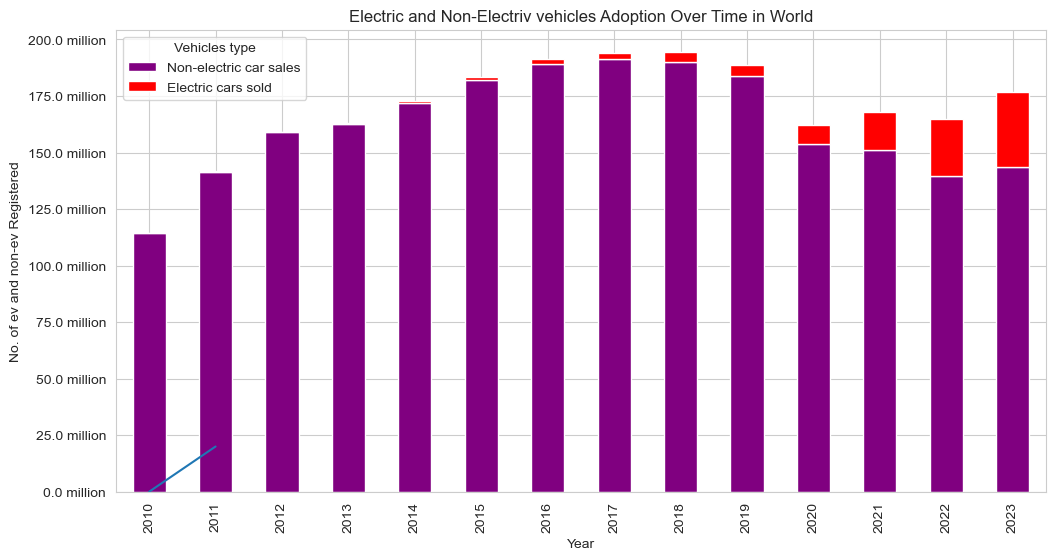

In [257]:
# Electic and Non-Electric vehicles adoption over Time in world

total_sold_vehicles = pd.read_csv('car-sales.csv')
# Getting total no. of electic and non-electric vehicle using pandas groupby method
d = total_sold_vehicles.groupby(["Year"]).sum('Electric cars sold')

# Converting long values into millions
def millions(x, pos):
    'The two args are the value and tick position'
    return str(round(x / 1e6, 1)) + " million"



m = pd.DataFrame({'Non-electric car sales': d['Non-electric car sales'],
                  'Electric cars sold': d['Electric cars sold'], },
                   index=p)

ax = m.plot(kind='bar', figsize=(12,6), stacked=True, color=['purple', 'red'])
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_formatter(NullFormatter())
ax.plot([0, 1], [0, 2e7])
plt.title('Electric and Non-Electriv vehicles Adoption Over Time in World')
plt.legend(title='Vehicles type')
plt.xlabel('Year')
plt.ylabel('No. of ev and non-ev Registered')
plt.show()

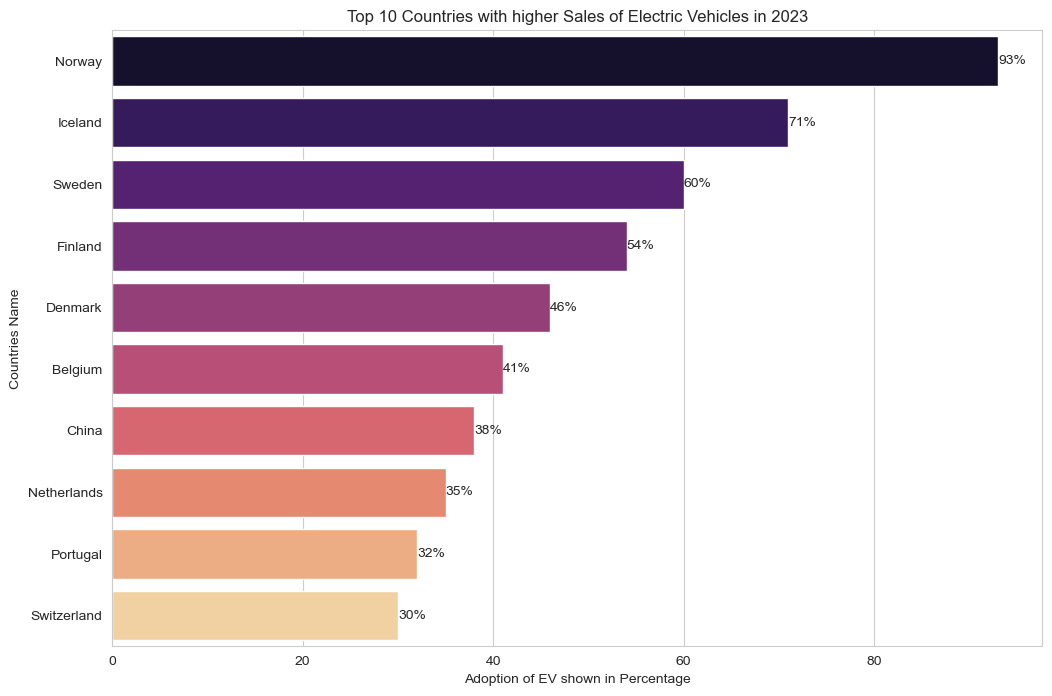

In [262]:
# Top 10 Countries with higher no. of Electric Vehicles Sold in 2023
ele_2023_sales = pd.read_csv('electric-car-sales-share.csv')

# Extracting top 10 countries with high ev sale in 2023
data = ele_2023_sales[ele_2023_sales.Year == 2023].sort_values(by=['Share of new cars that are electric'], ascending=False)


plt.figure(figsize=(12,8))
ax = sns.barplot(x=j['Share of new cars that are electric'].head(10), y=j.Entity.head(10), palette='magma')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%')
    

    
plt.title('Top 10 Countries with higher Sales of Electric Vehicles in 2023')

plt.xlabel('Adoption of EV shown in Percentage')
plt.ylabel('Countries Name')
plt.show()


In [287]:
# Now we will Focus on Specific Country for analyzing their market for 
# Electric vehicles and Non-electriv vehicle 
# You can download data from the link below
# https://catalog.data.gov/dataset/electric-vehicle-population-data
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
ev_data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191402,5YJ3E1EA0K,Pierce,Sumner,WA,98390.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,31.0,314927896,POINT (-122.2337855 47.2055969),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191403,JN1BF0BA7P,Pierce,Wilkeson,WA,98396.0,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,236213120,POINT (-122.0478543 47.1075591),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191404,7SAYGDEE4R,King,Fall City,WA,98024.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,261335896,POINT (-121.903093 47.567116),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
191405,7SAXCBE65N,Grays Harbor,Aberdeen,WA,98520.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,219273491,POINT (-123.807422 46.978243),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10


In [264]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

In [265]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [270]:
ev_data.isnull().dropna(inplace=True)

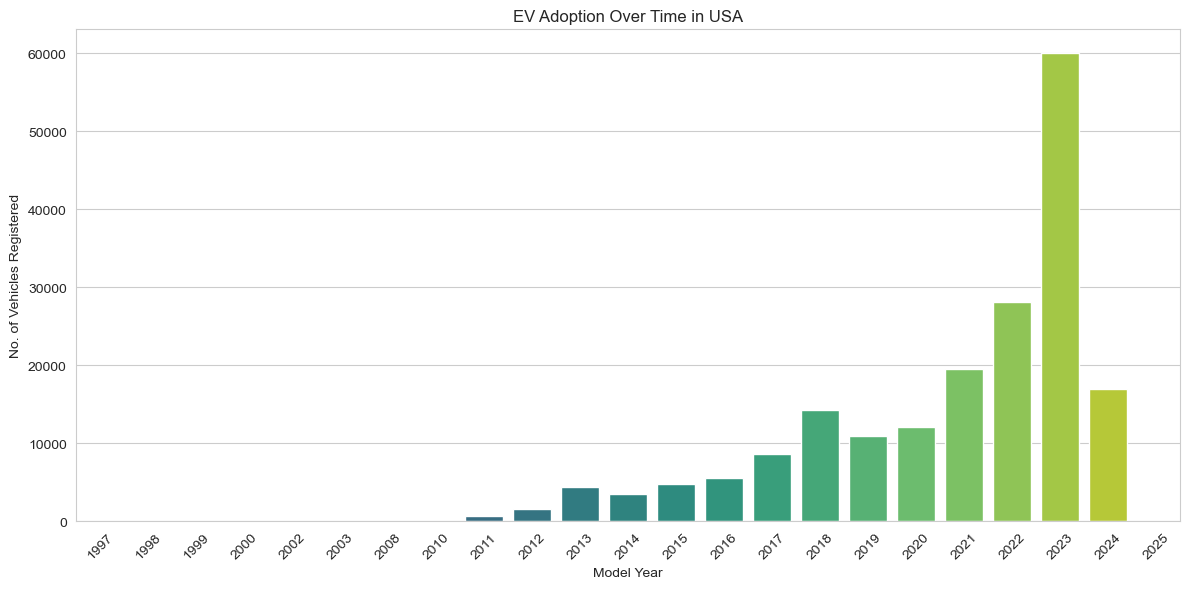

In [269]:
# EV Adoption Over Time
plt.figure(figsize=(12,6))
ev_adoption_by_year =ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y = ev_adoption_by_year.values , palette="viridis")
plt.title('EV Adoption Over Time in USA')
plt.xlabel('Model Year')
plt.ylabel('No. of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


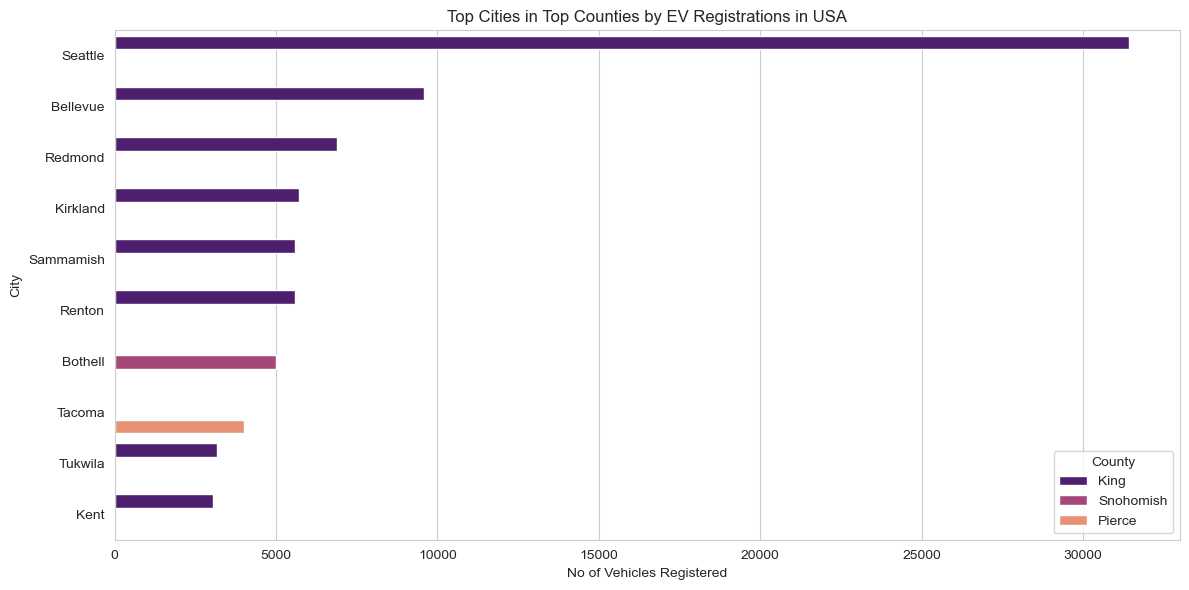

In [274]:
# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)


plt.figure(figsize=(12,6))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette='magma')
plt.title('Top Cities in Top Counties by EV Registrations in USA')
plt.xlabel('No of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

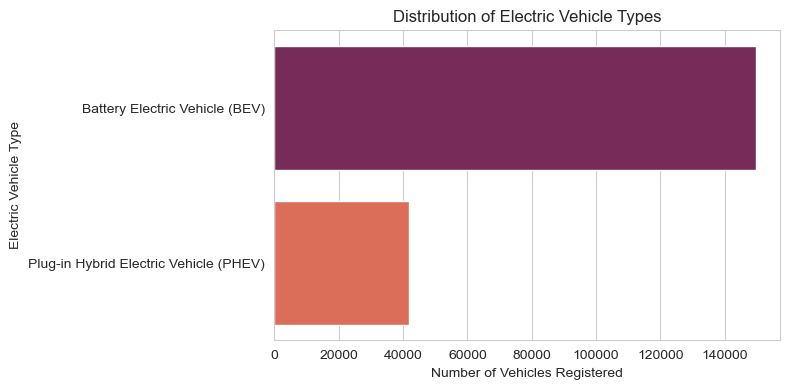

In [64]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette='rocket')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

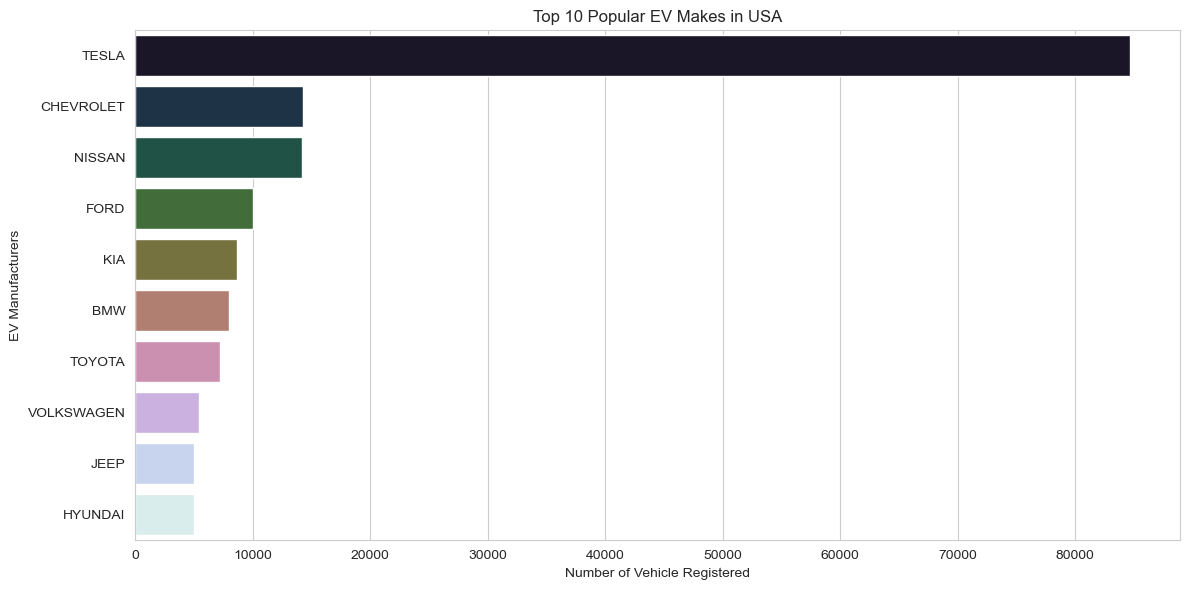

In [276]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette='cubehelix')
plt.title('Top 10 Popular EV Makes in USA')
plt.xlabel('Number of Vehicle Registered')
plt.ylabel('EV Manufacturers')
plt.tight_layout()
plt.show()

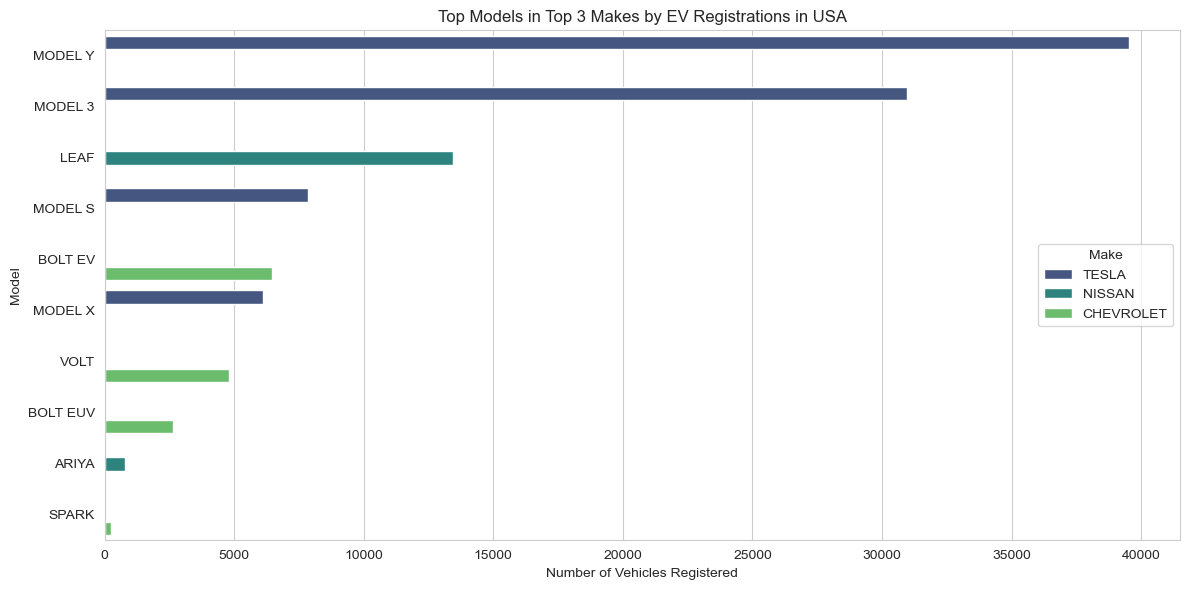

In [277]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette='viridis')
plt.title('Top Models in Top 3 Makes by EV Registrations in USA')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

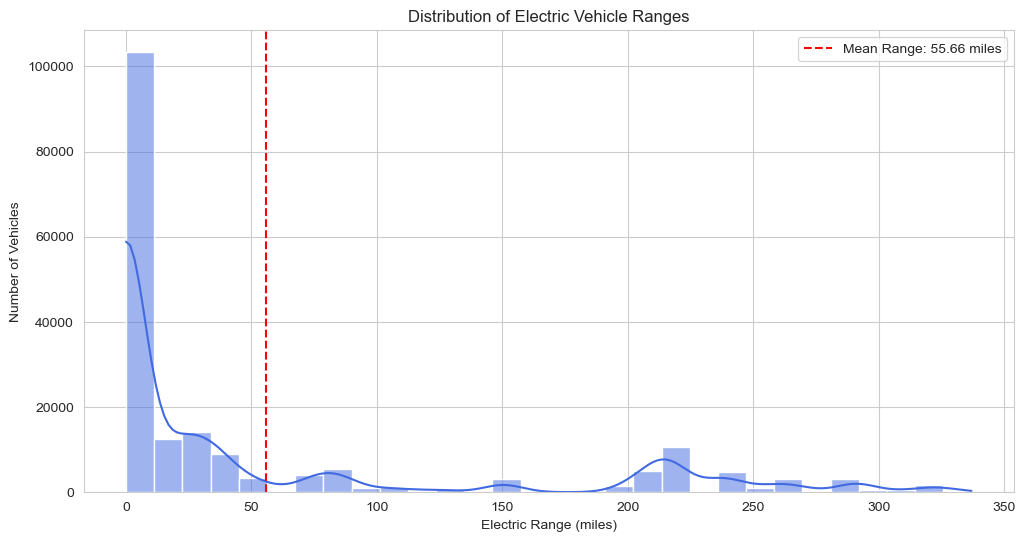

In [278]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

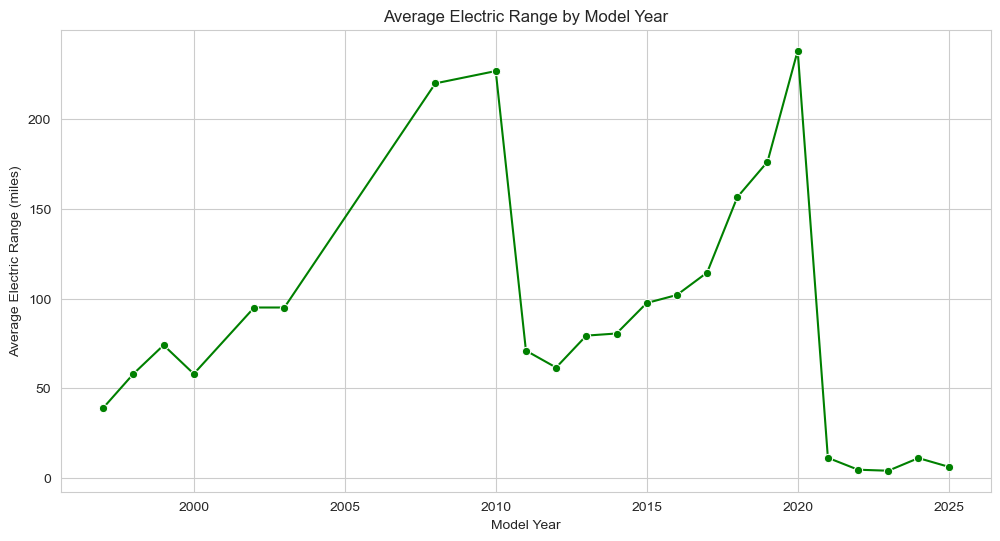

In [279]:
# calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

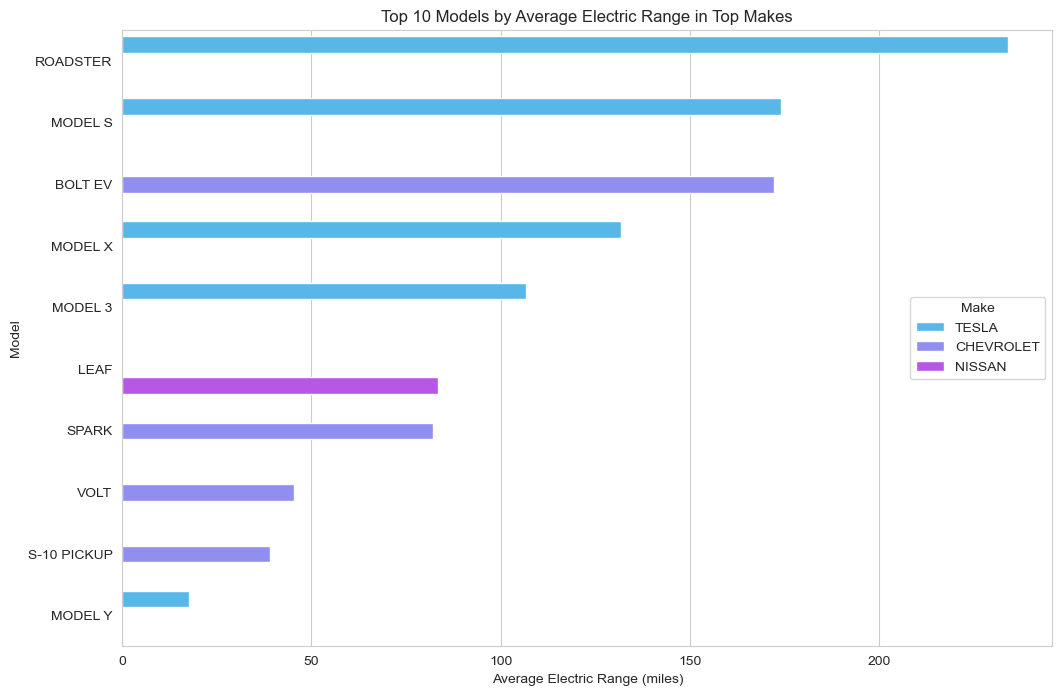

In [280]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

In [16]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       21
2010       24
2011      736
2012     1595
2013     4363
2014     3533
2015     4818
2016     5528
2017     8650
2018    14340
2019    10933
2020    12149
2021    19531
2022    28116
2023    60084
2024    16963
2025        6
Name: count, dtype: int64

In [17]:
# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

forecasted_evs

{2024: 84100.24940232627,
 2025: 129280.70156437236,
 2026: 198733.05865028742,
 2027: 305496.7069530712,
 2028: 469616.06988297525,
 2029: 721903.8636845589}

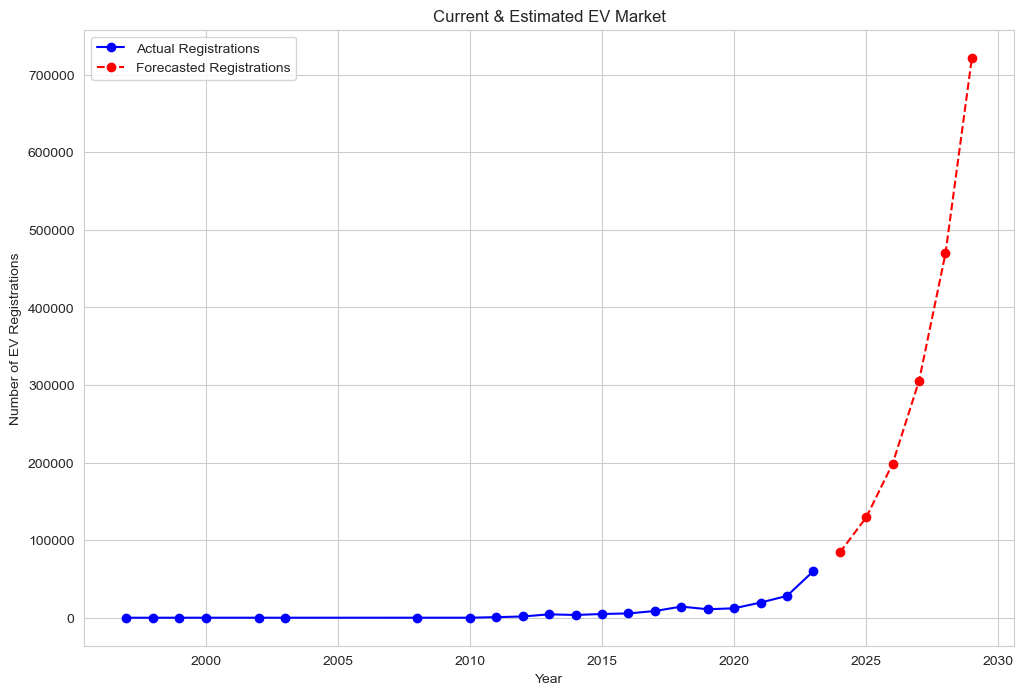

In [18]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
Conclusion
Based on current trends and predictive modeling using Python, the EV market in the USA is expected to grow significantly, reaching an estimated 0.7 
million units by 2030 every year. This projection underscores a strong shift towards electric mobility driven by technological advancements and 
increasing consumer demand for sustainable transportation solutions.